In [1]:
#basic package
import json
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import shutil
import time
import datetime as dt
import itertools
import time
import re
from collections import Counter
from collections import defaultdict
import operator
import math
from scipy import stats
import pickle
from collections import Counter

#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

#modelling
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

#plot
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm
import seaborn as sns

c:\users\camil\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from UTILS import kmeans_clustering, pca_fct
import config_mobility as config

c:\users\camil\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


we restrict the time series to one value per 60 seconds 
we compute the complexity variables each 30 minutes 
each variables includes the values of at least the last 120.00 minutes (i.e. are using 120.00 values)


In [3]:
path_extracted_data = config.path_extracted_data
id_run = config.id_run
title_ = 'LB_mobility' #LSL_mobility, LB_mobility, all_mobility
path_save_ = os.path.join(path_extracted_data, 'visual', 'Daily_var_investigation', title_)
#create a director if not existinga
if not os.path.exists(path_save_):
    os.makedirs(path_save_)

# Download daily variables df

In [4]:
df = pd.read_csv(os.path.join(path_save_,'df_mlp.csv'), sep=';', parse_dates=['level'])
print(df.shape)
df.head(3)

(3545, 63)


HenID FirstTimestamp_zone_1  FirstTimestamp_zone_1_h  \
0  hen_41   2017-07-06 09:48:10                 9.802778   
1  hen_41   2017-07-07 10:12:29                10.208056   
2  hen_41                   NaN                      NaN   

  FirstTimestamp_zone_2  FirstTimestamp_zone_2_h FirstTimestamp_zone_3  \
0   2017-07-06 03:15:07                 3.251944   2017-07-06 02:01:03   
1   2017-07-07 06:04:44                 6.078889   2017-07-07 02:00:00   
2   2017-07-08 10:36:20                10.605556   2017-07-08 02:00:00   

   FirstTimestamp_zone_3_h FirstTimestamp_zone_4  FirstTimestamp_zone_4_h  \
0                   2.0175   2017-07-06 02:00:00                 2.000000   
1                   2.0000   2017-07-07 02:32:16                 2.537778   
2                   2.0000   2017-07-08 02:59:54                 2.998333   

  FirstTimestamp_zone_5   ...    percentile_85  percentile_95 session  \
0   2017-07-06 03:17:07   ...        41.191667      76.807500     day   
1   2017-07-07 02:33:01   ...        31.924167      58.425833     day   
2   2017-07-08 03:48:28   ...        50.223333      81.794167     day   

                     t_DU_missingZone_mvtPerc  up_missingZone_mvtNbr  \
0   (4.25531914893617, 2.127659574468085, 48)                    1.0   
1  (4.918032786885246, 1.639344262295082, 62)                    1.0   
2               (2.3255813953488373, 0.0, 44)                    0.0   

   up_missingZone_mvtPerc variance_duration  \
0                2.127660          0.000050   
1                1.639344          0.000029   
2                0.000000          0.000063   

   verification_daily_total_duration  \
0                            54000.0   
1                            54000.0   
2                            54000.0   

                                           zone_list  hybrid  
0  ('zone_4', 'zone_4', 'zone_4', 'zone_4', 'zone...      LB  
1  ('zone_3', 'zone_3', 'zone_3', 'zone_3', 'zone...      LB  
2  ('zone_3', 'zone_3', 'zone_3', 'zone_3', 'zone...      LB  

[3 rows x 63 columns]

In [16]:
#choose continuous and categorical varaibles to analyse
li_var_cat = ['Max_duration_zones']
li_var_cont = ['Max_duration_zone_4','Total_number_transition', 'Total_number_zone',
           'chatoicmvt_Middlezone_1_nbr','chatoicmvt_Middlezone_2_nbr','chatoicmvt_Middlezone_3_nbr',
           'chatoicmvt_Middlezone_4_nbr','chatoicmvt_Middlezone_5_nbr',
           'distribution_entropy', 'SampEnt_order2',
           'down_missingZone_mvtNbr', 'down_missingZone_mvtPerc','up_missingZone_mvtNbr', 'up_missingZone_mvtPerc',
           'duration_zone_1', 'duration_zone_2', 'duration_zone_3','duration_zone_4', 'duration_zone_5',
           'max_duration', 'mean_duration', 'median_duration', 'min_duration', 'variance_duration',
           'nbr_bouts_zone_1','nbr_bouts_zone_2', 'nbr_bouts_zone_3', 'nbr_bouts_zone_4','nbr_bouts_zone_5', 
           'percentile_15', 'percentile_5', 'percentile_85','percentile_95']
len(li_var_cont)

33

# Simplest Visual of each continuous var per hen - consistency over time

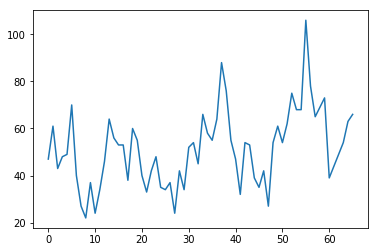

In [33]:
plt.plot(df[df['HenID']=='hen_41']['Total_number_transition'].tolist());

In [ ]:
li_hen = df['HenID'].unique()
c = 6
l = math.ceil(len(li_hen)/c) #round up
img_w = 6 
img_h = 3 

for var in li_var_cont:
    fig = plt.figure(figsize=(int(c*img_w), int(l*img_h)))
    for i,henid in enumerate(li_hen):
        plt.subplot(l,c,i+1)
        plt.tight_layout()
        plt.plot(df[df['HenID']==henid][var].tolist());
        plt.xticks([]) #remove xlabel annotations
        plt.yticks([])
        plt.title(henid+'  pca_comp', size=12)
    plt.savefig(os.path.join(path_save_,var+'_over_time_per_hen.png'), pi=300,format='png',bbox_inches='tight')
    plt.show()

# PCA on daily variable

C:\Users\camil\Desktop\animals_code\PhD\UTILS.py:1986: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  df = pd.DataFrame(scale(df), columns=df.columns)


PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy

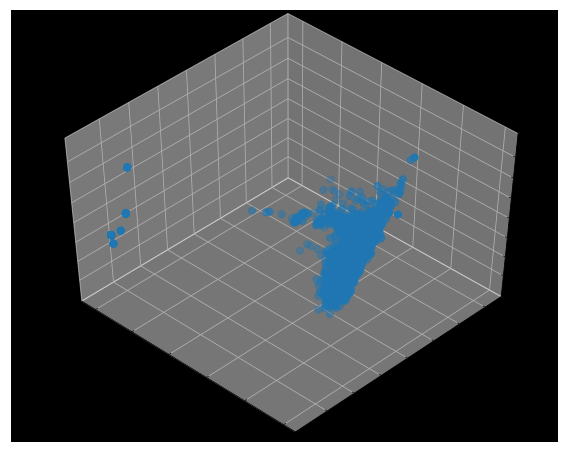

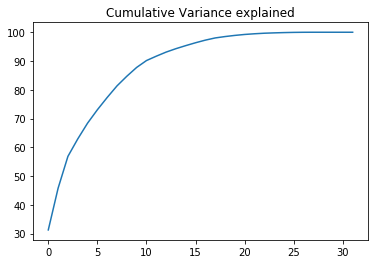

In [6]:
df_pca = pca_fct(df, li_var_cont)

In [7]:
df_pca.rename(columns={i:'PCA_comp_'+str(i) for i in df_pca.columns if i!='index'}, inplace=True)
df_pca['index'] = range(df_pca.shape[0])
df['index'] = range(df.shape[0])
print(df_pca.shape, df.shape)
df_with_pca = pd.merge(df, df_pca, on='index')
print(df_with_pca.shape)
df_with_pca.head(5)

(3545, 33) (3545, 64)
(3545, 96)


HenID FirstTimestamp_zone_1  FirstTimestamp_zone_1_h  \
0  hen_41   2017-07-06 09:48:10                 9.802778   
1  hen_41   2017-07-07 10:12:29                10.208056   
2  hen_41                   NaN                      NaN   
3  hen_41   2017-07-09 10:19:29                10.324722   
4  hen_41   2017-07-10 10:03:55                10.065278   

  FirstTimestamp_zone_2  FirstTimestamp_zone_2_h FirstTimestamp_zone_3  \
0   2017-07-06 03:15:07                 3.251944   2017-07-06 02:01:03   
1   2017-07-07 06:04:44                 6.078889   2017-07-07 02:00:00   
2   2017-07-08 10:36:20                10.605556   2017-07-08 02:00:00   
3   2017-07-09 05:27:50                 5.463889   2017-07-09 02:04:45   
4   2017-07-10 05:47:27                 5.790833   2017-07-10 02:00:17   

   FirstTimestamp_zone_3_h FirstTimestamp_zone_4  FirstTimestamp_zone_4_h  \
0                 2.017500   2017-07-06 02:00:00                 2.000000   
1                 2.000000   2017-07-07 02:32:16                 2.537778   
2                 2.000000   2017-07-08 02:59:54                 2.998333   
3                 2.079167   2017-07-09 02:04:06                 2.068333   
4                 2.004722   2017-07-10 02:00:00                 2.000000   

  FirstTimestamp_zone_5      ...       PCA_comp_22  PCA_comp_23 PCA_comp_24  \
0   2017-07-06 03:17:07      ...         -0.079188    -0.037431    0.054916   
1   2017-07-07 02:33:01      ...          0.202913     0.093191    0.126723   
2   2017-07-08 03:48:28      ...         -0.128290    -0.268662   -0.015355   
3   2017-07-09 02:00:00      ...          0.031304     0.062596    0.083112   
4   2017-07-10 02:43:31      ...         -0.202224    -0.212512   -0.080718   

   PCA_comp_25  PCA_comp_26  PCA_comp_27 PCA_comp_28  PCA_comp_29 PCA_comp_30  \
0     0.170216     0.017717     0.035910   -0.005402     0.001649    0.000559   
1     0.091382    -0.003121    -0.142197    0.004159    -0.000289   -0.000630   
2     0.301286    -0.025599     0.026311    0.006800    -0.005182    0.000262   
3     0.103247     0.023377     0.037916   -0.005280     0.007865    0.000156   
4     0.100995    -0.048544     0.023255    0.009191    -0.004765    0.000401   

    PCA_comp_31  
0 -7.103724e-17  
1 -3.338464e-16  
2  5.973959e-16  
3 -4.965919e-16  
4  8.057728e-17  

[5 rows x 96 columns]

#### PCA value over time per hen

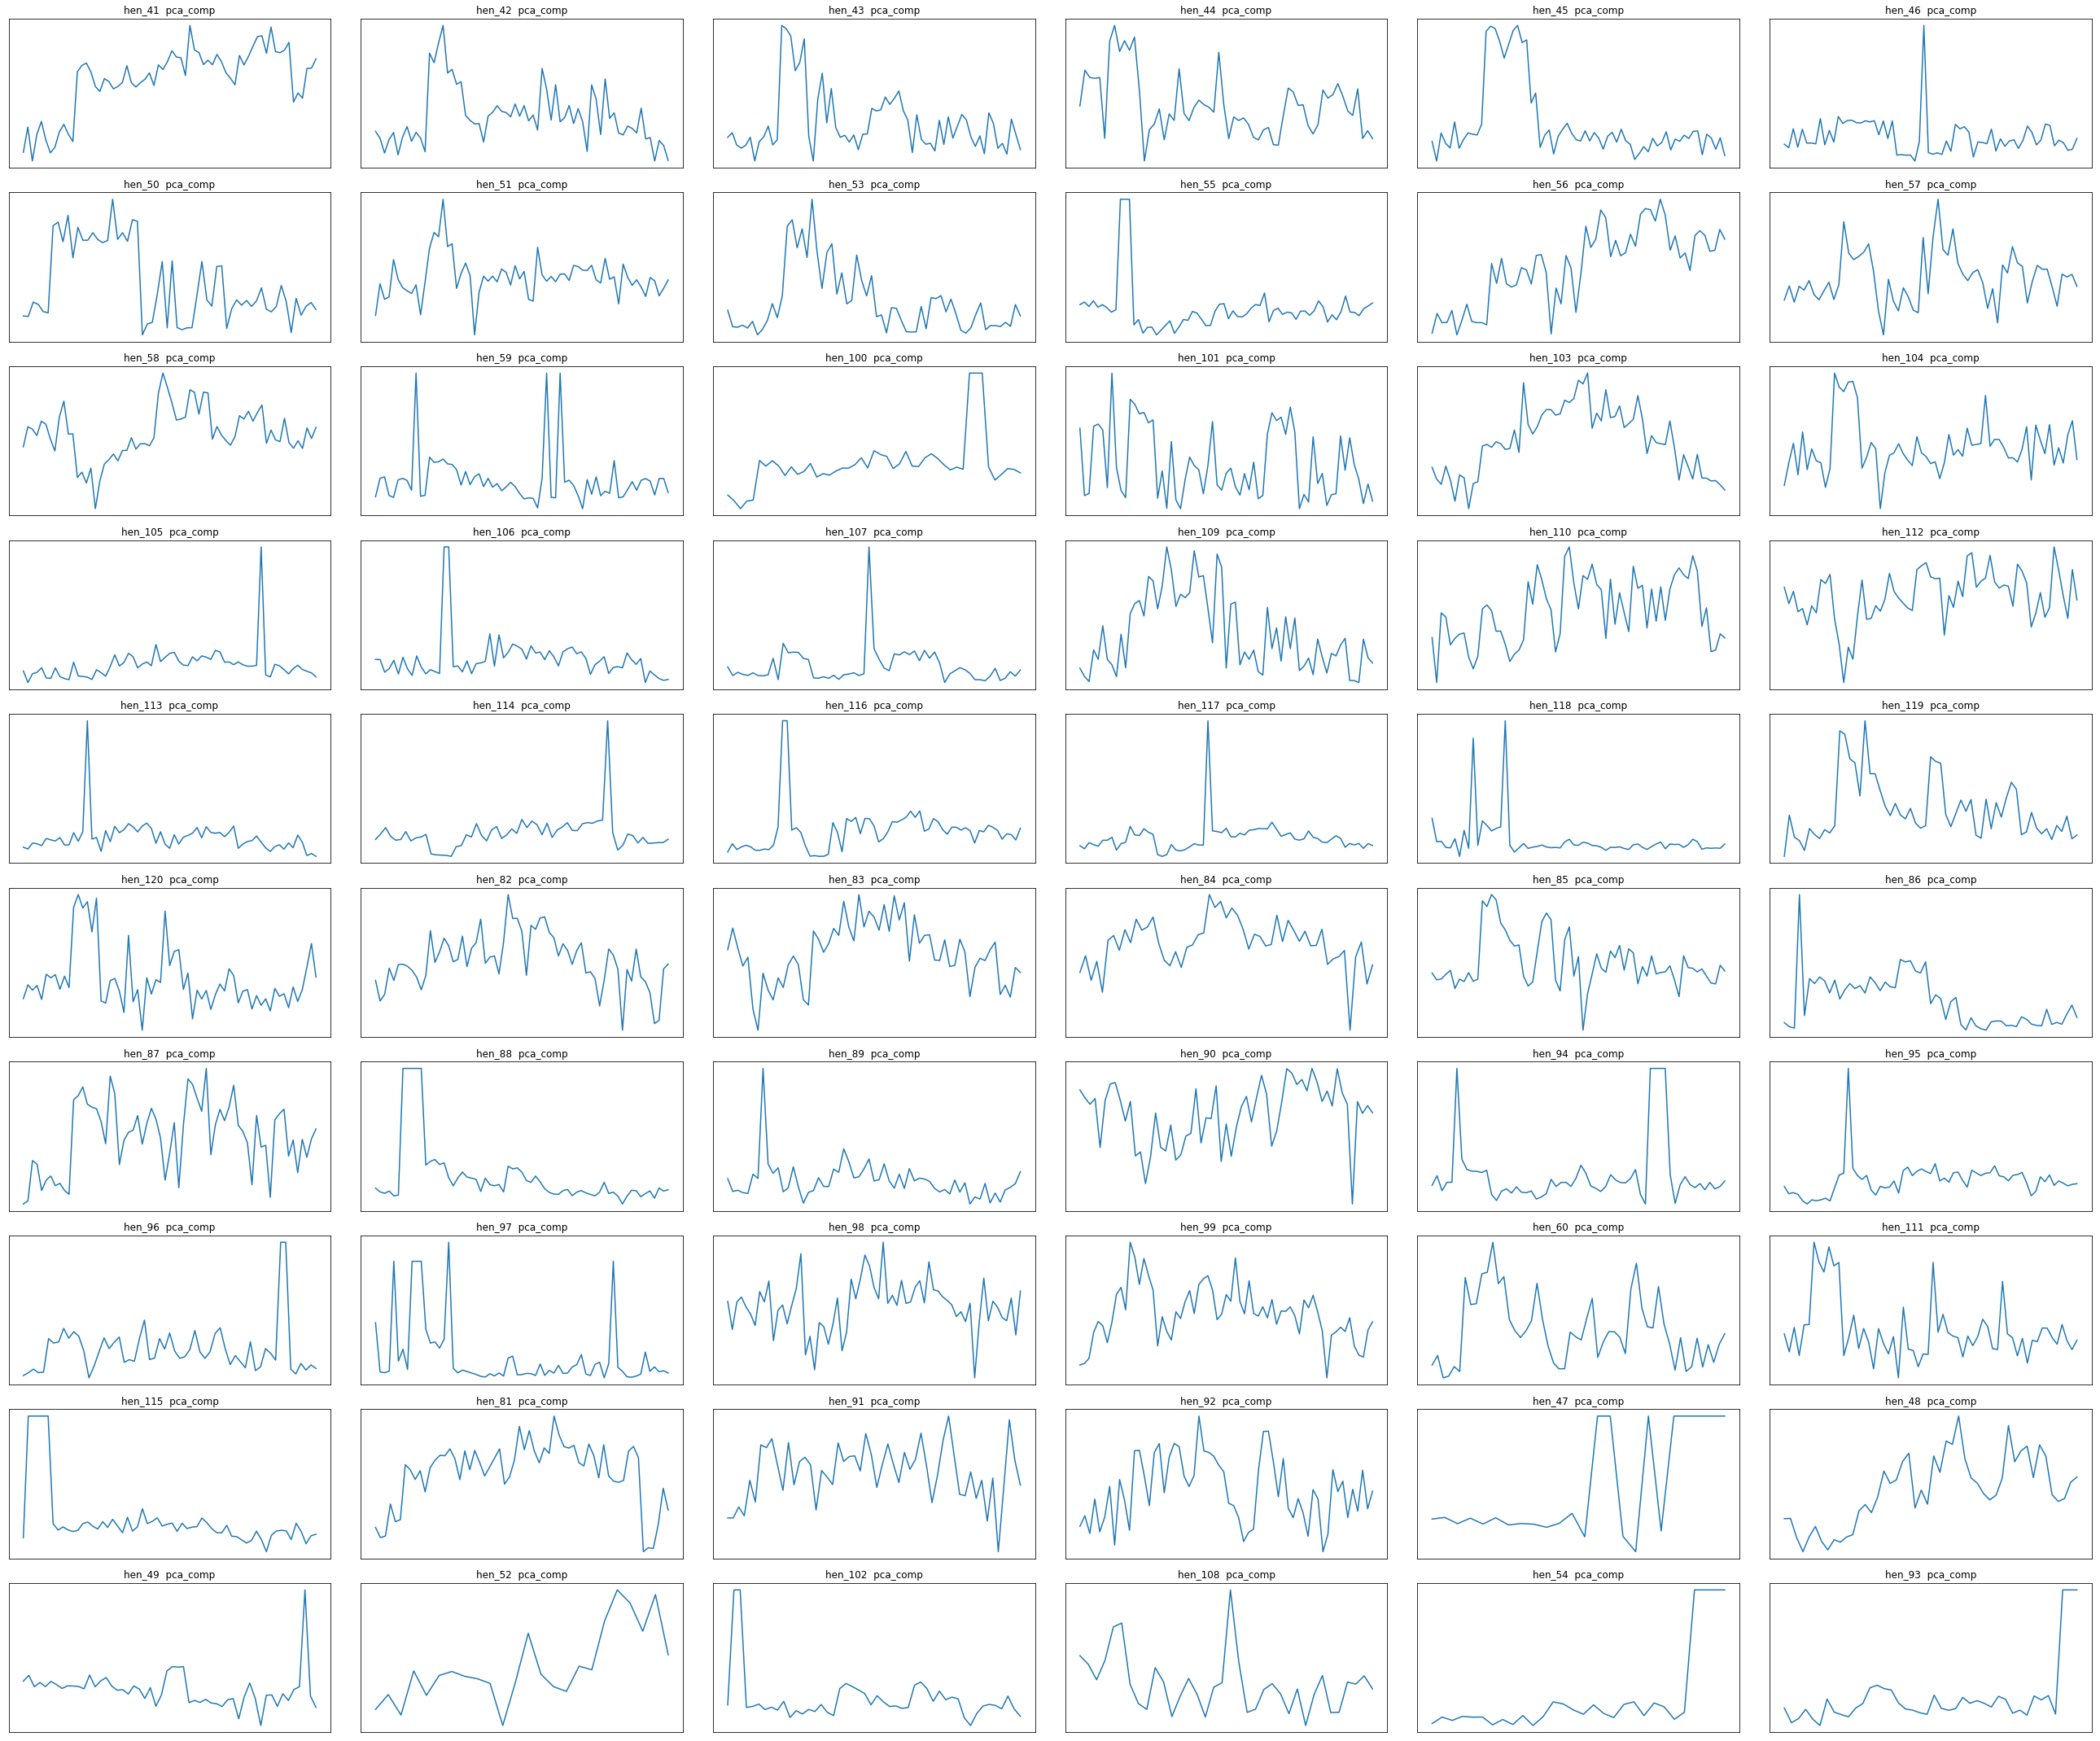

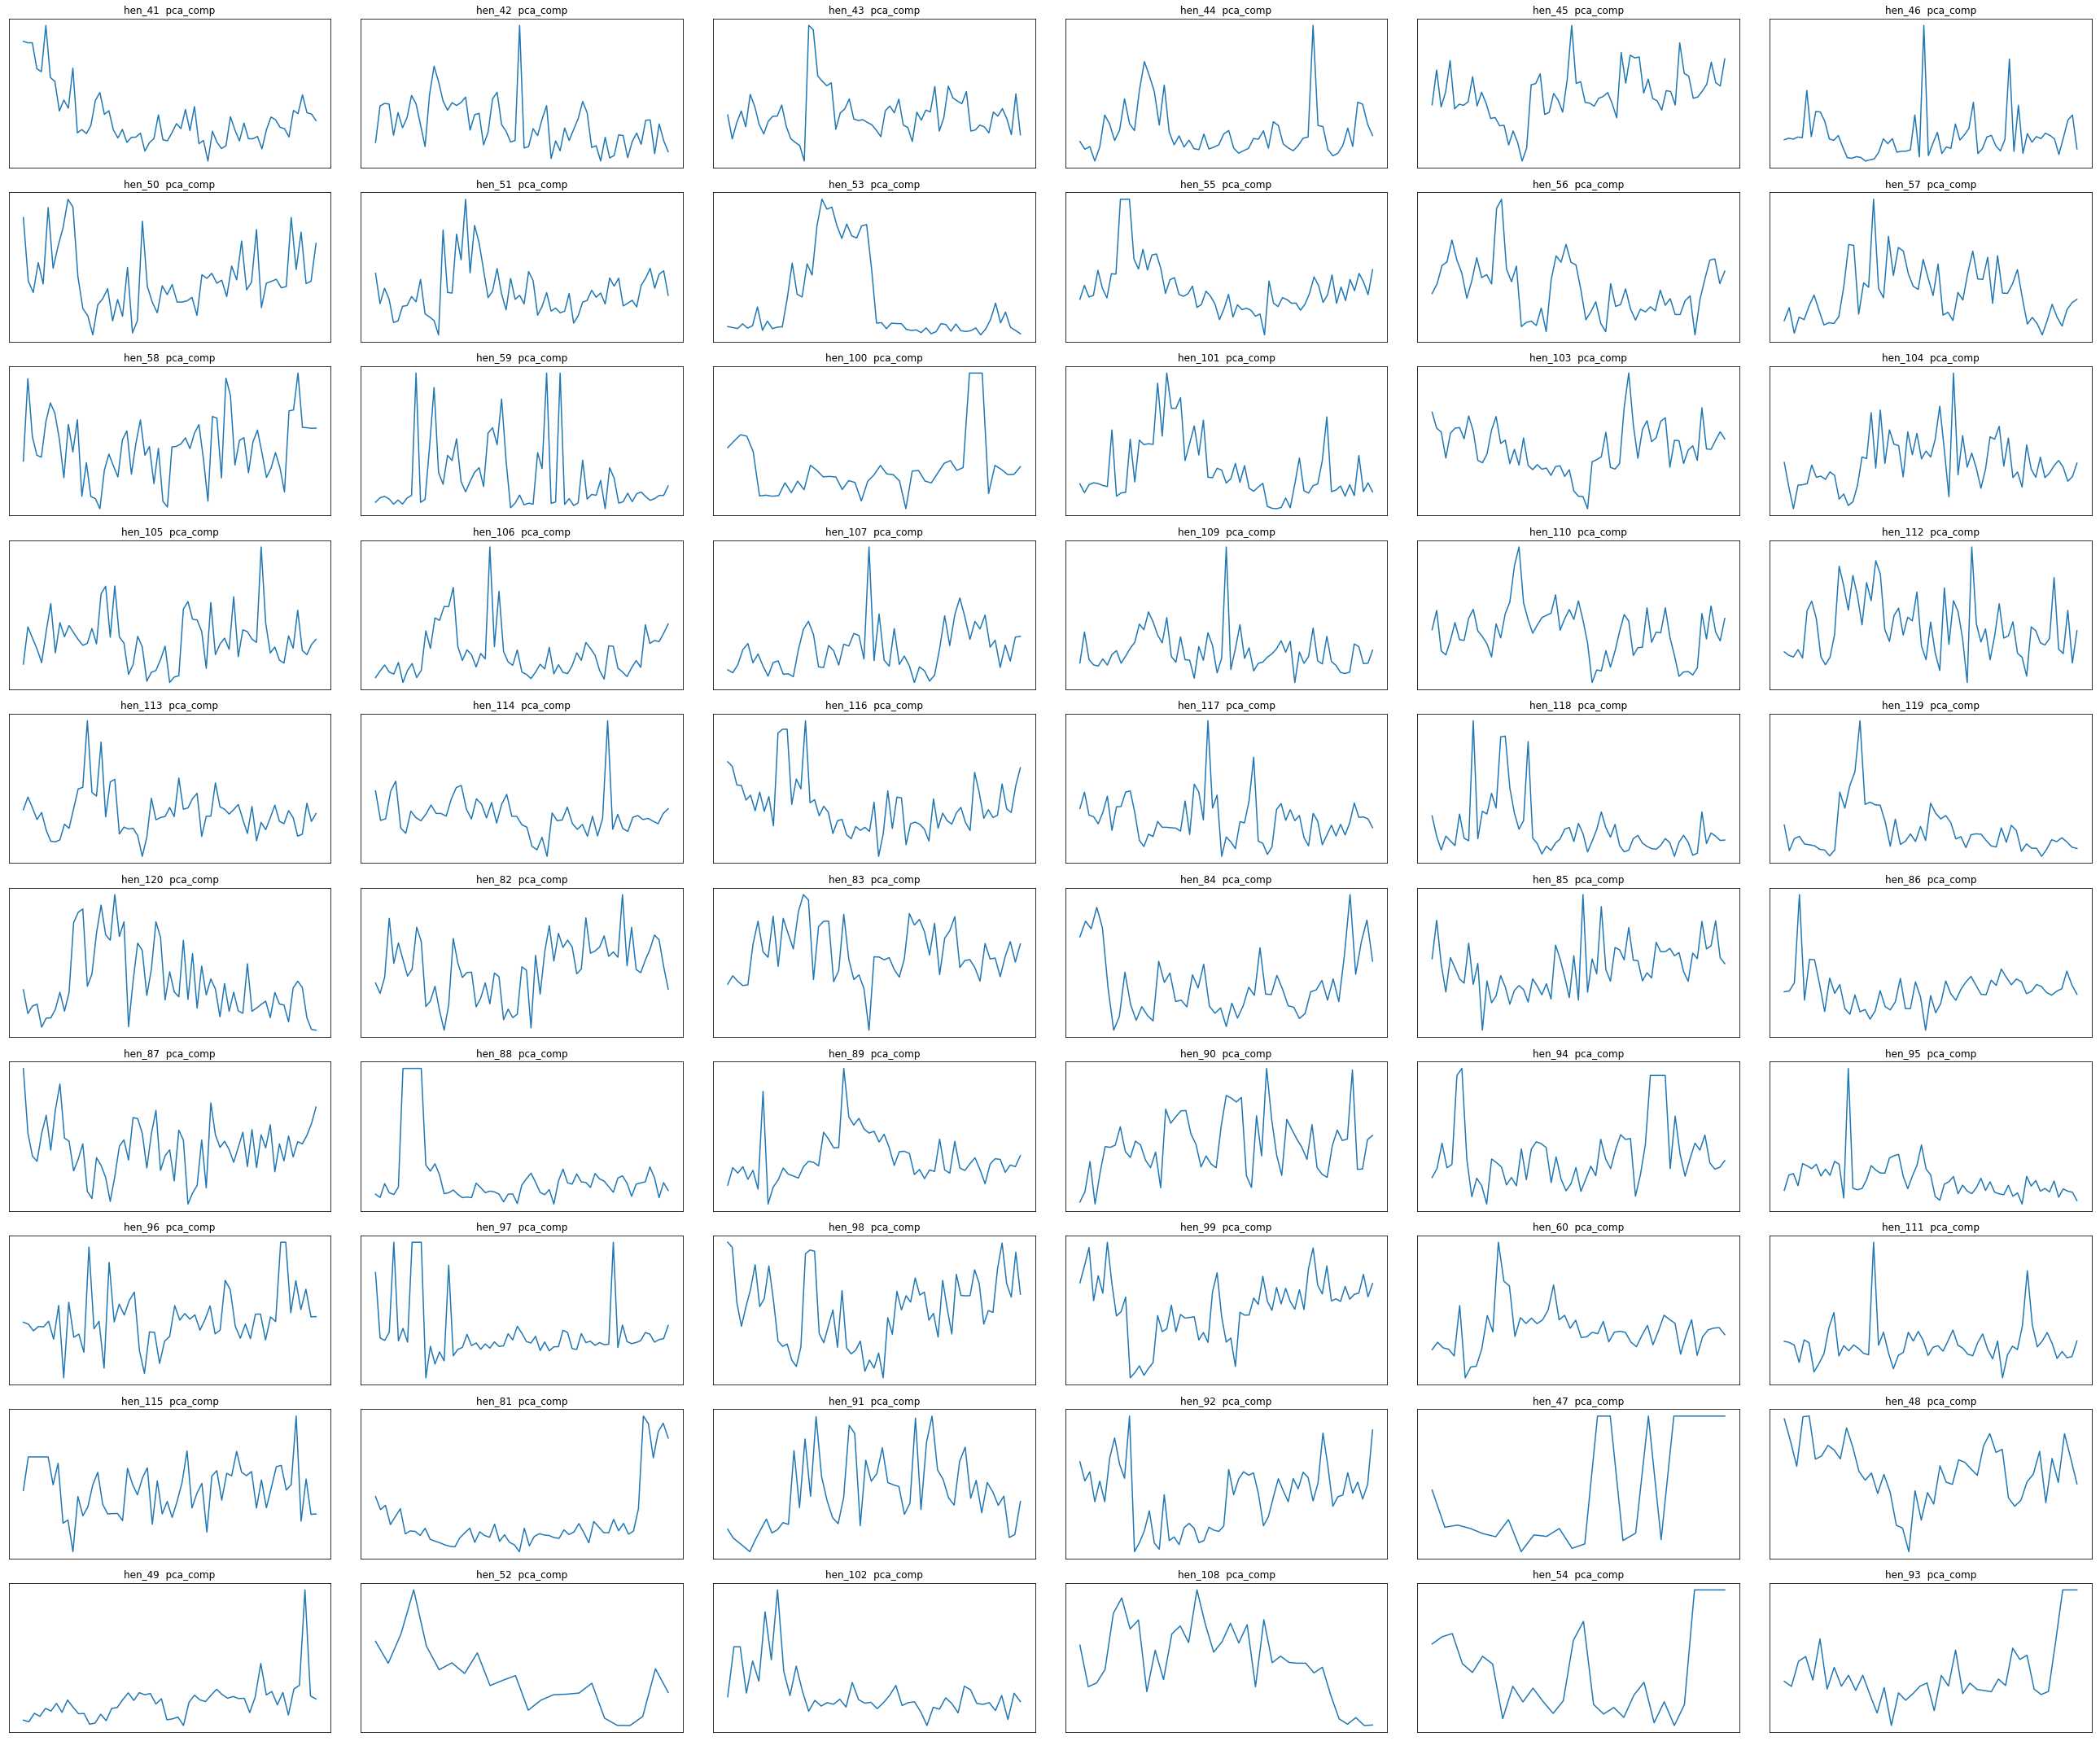

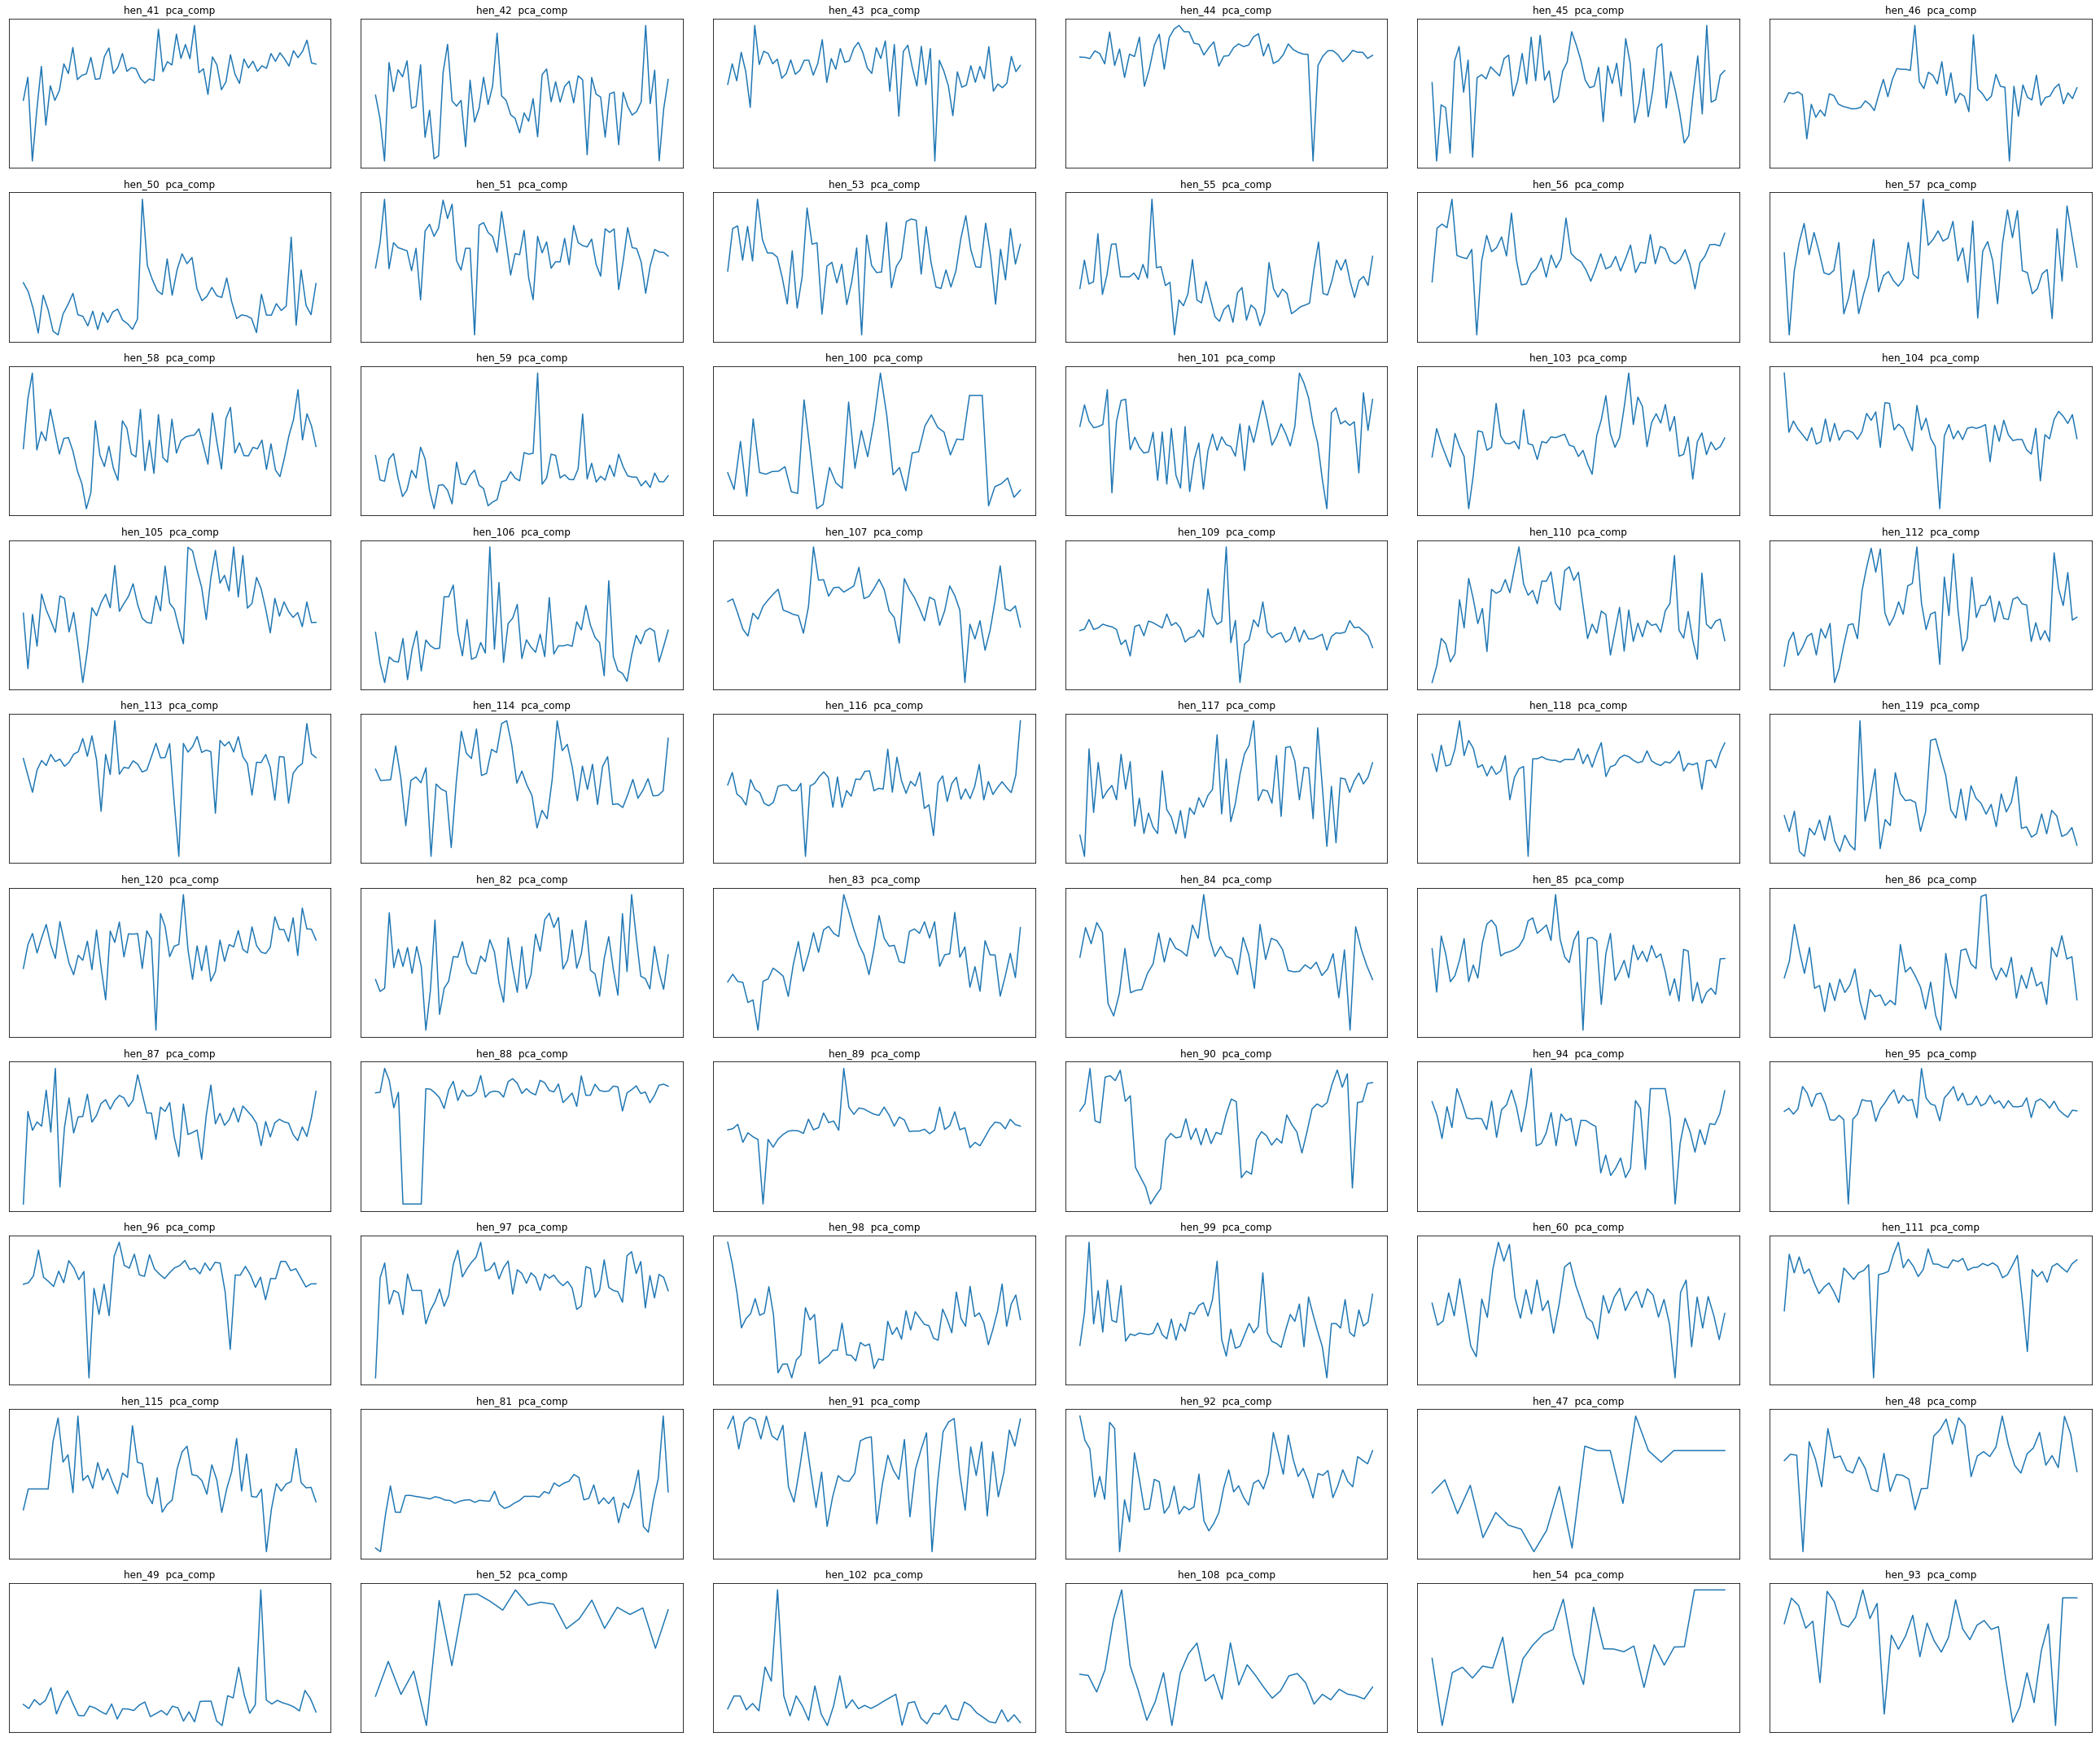

In [31]:
li_hen = df_with_pca['HenID'].unique()
c = 6
l = math.ceil(len(li_hen)/c) #round up
img_w = 6 
img_h = 3 

for pca_comp in ['PCA_comp_1', 'PCA_comp_2', 'PCA_comp_3']:
    fig = plt.figure(figsize=(int(c*img_w), int(l*img_h)))
    for i,henid in enumerate(li_hen):
        plt.subplot(l,c,i+1)
        plt.tight_layout()
        plt.plot(df_with_pca[df_with_pca['HenID']==henid][pca_comp].tolist());
        plt.xticks([]) #remove xlabel annotations
        plt.yticks([])
        plt.title(henid+'  pca_comp', size=12)
    plt.savefig(os.path.join(path_save_,pca_comp+'_over_time_per_hen.png'), pi=300,format='png',bbox_inches='tight')
    plt.show()

# Clustering of all MLPs variable at daily ts level - MLPs profiles

In [8]:
#with pca
li_var_clustering = ['PCA_comp_1','PCA_comp_2','PCA_comp_3','PCA_comp_4','PCA_comp_5'] #if we want to cluster o PCA principal components
type_clustering = '_with_pca'

#without pca
#li_var_clustering = li_var_cont
#type_clustering = 'no_pca'

df_clustering = df_with_pca.copy()
r,center_ = kmeans_clustering(df_clustering, range(2,15), drop_col_list=[i for i in df.columns if i not in li_var_clustering])
r = pd.DataFrame(r)
r.head(3)

For n_clusters = 2 The average silhouette_score is : 0.674473400356702
For n_clusters = 3 The average silhouette_score is : 0.2336121829523594
For n_clusters = 4 The average silhouette_score is : 0.18479492692542282
For n_clusters = 5 The average silhouette_score is : 0.20076737553545723
For n_clusters = 6 The average silhouette_score is : 0.1592743011795892
For n_clusters = 7 The average silhouette_score is : 0.1601114421460501
For n_clusters = 8 The average silhouette_score is : 0.16485151471203643
For n_clusters = 9 The average silhouette_score is : 0.1577893667442694
For n_clusters = 10 The average silhouette_score is : 0.16511065945572503
For n_clusters = 11 The average silhouette_score is : 0.16414899890243398
For n_clusters = 12 The average silhouette_score is : 0.17367535237493656
For n_clusters = 13 The average silhouette_score is : 0.1683094429998986
For n_clusters = 14 The average silhouette_score is : 0.17643475522397345
Please let me know the numbers of clusters you want t

0
0  3
1  4
2  3

In [11]:
#concatenate with clustering coeficient
df_plt = pd.concat([df_with_pca[['HenID','level']+list(set(li_var_cont+li_var_clustering))],pd.DataFrame(r)], axis=1)
df_plt.rename(columns={0:'clustering_coeff'}, inplace=True)
nbr_cluster = len(df_plt['clustering_coeff'].unique())
path_ = os.path.join(path_save_, str(nbr_cluster)+type_clustering)
#create a director if not existing
if not os.path.exists(path_):
    os.makedirs(path_)
df_plt.head(3)

HenID      level  chatoicmvt_Middlezone_1_nbr  nbr_bouts_zone_1  \
0  hen_41 2017-07-06                            0                 3   
1  hen_41 2017-07-07                            1                 8   
2  hen_41 2017-07-08                            0                 0   

   chatoicmvt_Middlezone_5_nbr  chatoicmvt_Middlezone_4_nbr  \
0                            2                            3   
1                            1                            3   
2                            3                            4   

   Total_number_zone  chatoicmvt_Middlezone_2_nbr  nbr_bouts_zone_3  \
0                  5                            1                 8   
1                  5                            2                14   
2                  4                            0                 9   

   variance_duration        ...         nbr_bouts_zone_5  percentile_85  \
0           0.000050        ...                       13      41.191667   
1           0.000029        ...                       11      31.924167   
2           0.000063        ...                       13      50.223333   

   distribution_entropy  duration_zone_3  down_missingZone_mvtPerc  \
0              1.284211         2.745278                  4.255319   
1              1.533345         2.273611                  4.918033   
2              1.143957         3.558333                  2.325581   

   percentile_95  min_duration  duration_zone_4  max_duration  \
0      76.807500      0.200000         2.215000      0.030500   
1      58.425833      0.066667         2.393889      0.020306   
2      81.794167      0.066667         2.458889      0.033208   

   clustering_coeff  
0                 3  
1                 4  
2                 3  

[3 rows x 41 columns]

c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
c:\users\camil\anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy

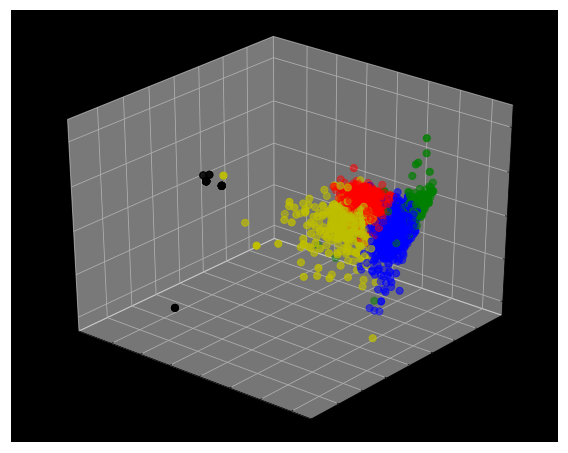

In [15]:
#plot the first 3 PCA comp with the color being from the clustering
df_plt['clustering_coeff'] = df_plt['clustering_coeff'].map({0:'r',1:'g',2:'black',3:'blue',4:'y',5:'grey'})
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=130) #change number to change point's places on the figure
plt.gca().patch.set_facecolor('black')
ax.scatter(df_plt['PCA_comp_1'], df_plt['PCA_comp_2'], df_plt['PCA_comp_3'], s=50,c=df_plt['clustering_coeff'].tolist())
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [13]:
#### one table with mean for each variable within each clusters
li_df = []
for k in df_plt['clustering_coeff'].unique():
    df0 = df_plt[df_plt['clustering_coeff']==k]
    li_df.append(df0.mean())
df_m = pd.concat(li_df,axis=1)
df_m.to_csv(os.path.join(path_,'dailyTS_clusters_properties.csv'))
print(df_m.shape)
df_m.head(5)

(39, 5)


0         1         2         3         4
chatoicmvt_Middlezone_1_nbr  0.250725  0.230769  0.027211  0.552388  0.000000
nbr_bouts_zone_1             3.024638  6.903226  0.183673  6.106914  0.061538
chatoicmvt_Middlezone_5_nbr  0.236957  0.305211  0.040816  0.022096  0.000000
chatoicmvt_Middlezone_4_nbr  0.425362  0.464020  0.367347  0.186030  0.000000
Total_number_zone            4.724638  4.898263  3.377551  4.364220  1.000000

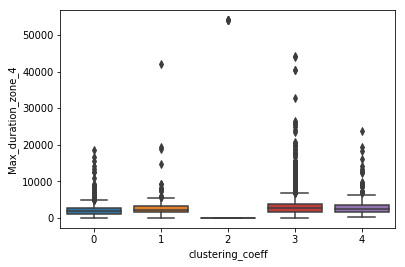

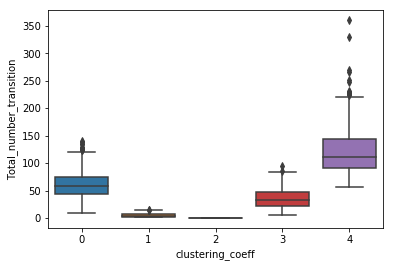

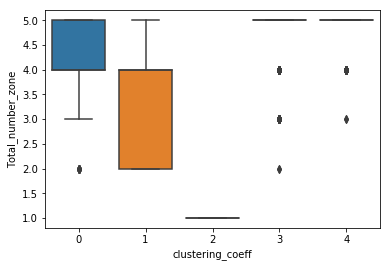

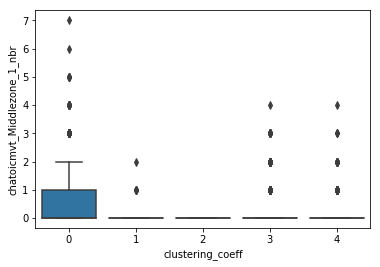

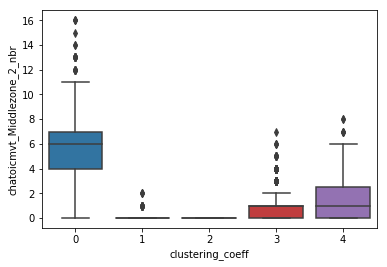

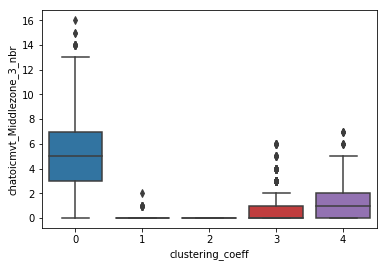

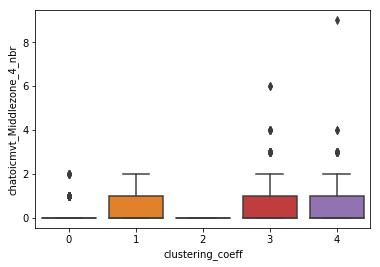

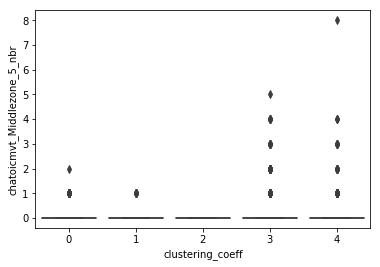

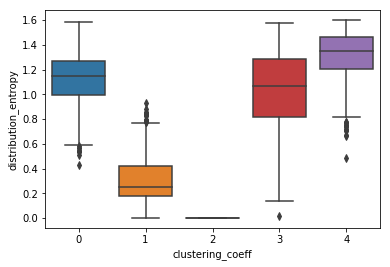

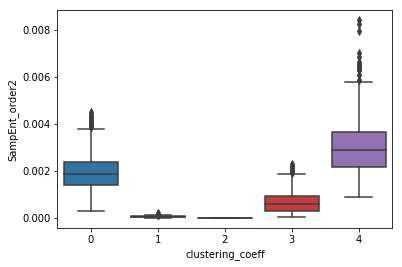

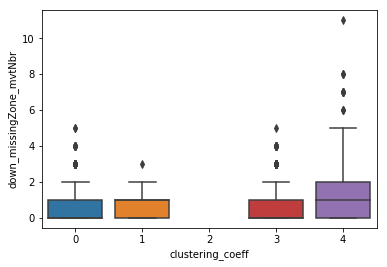

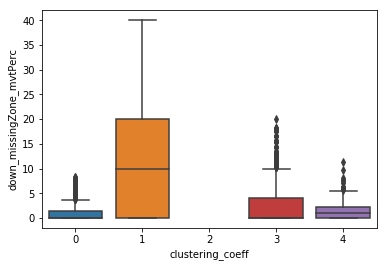

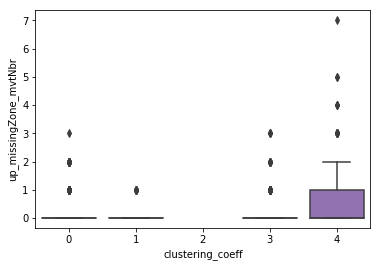

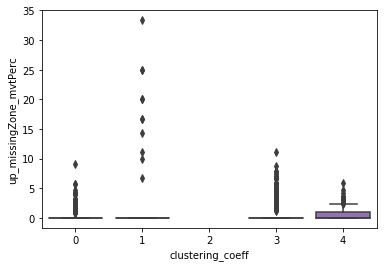

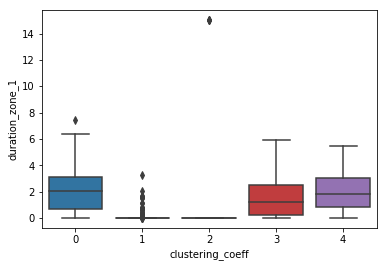

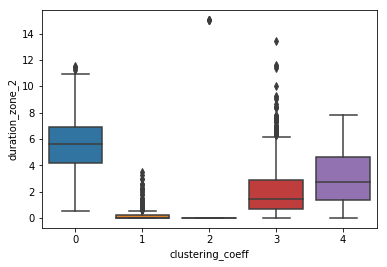

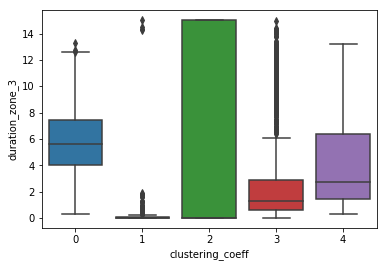

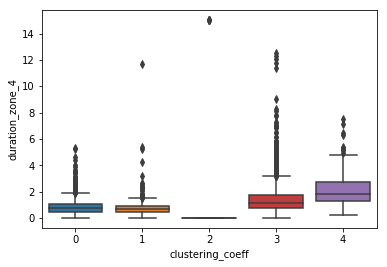

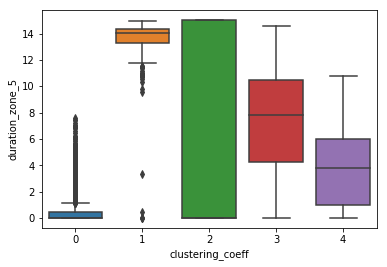

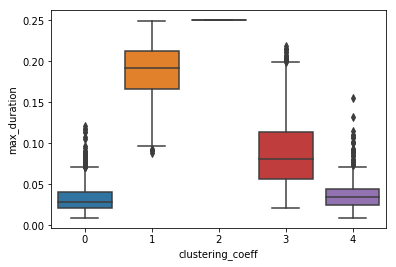

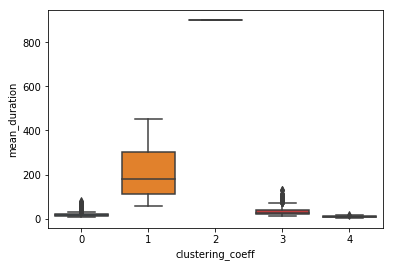

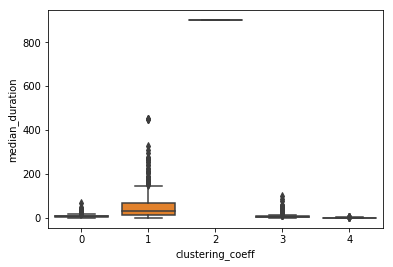

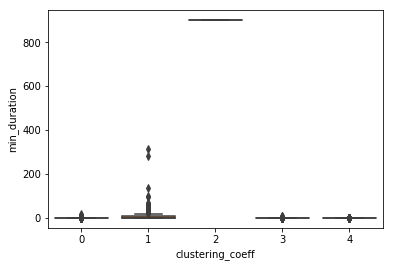

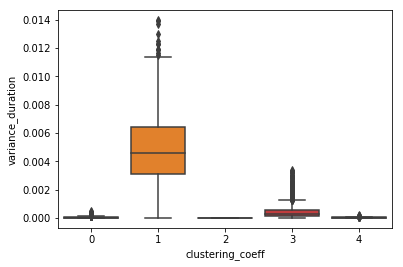

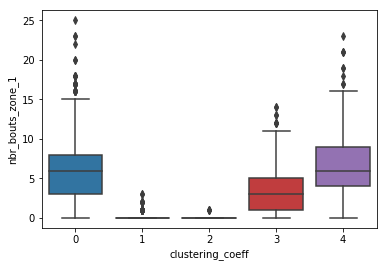

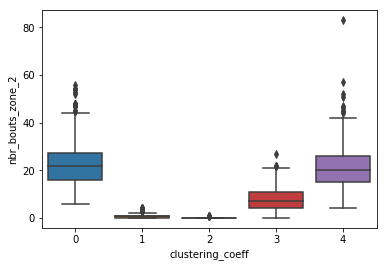

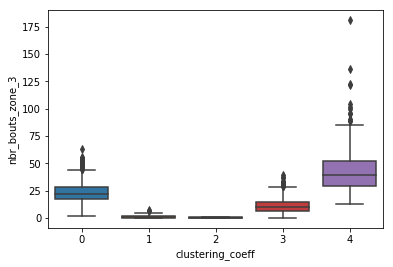

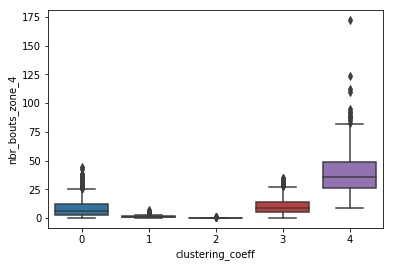

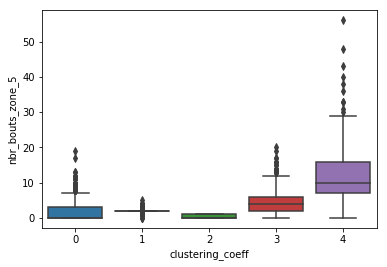

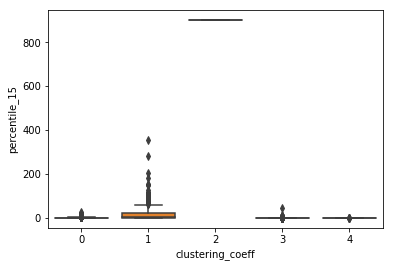

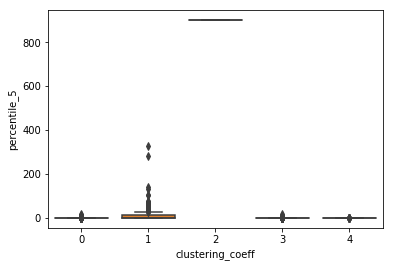

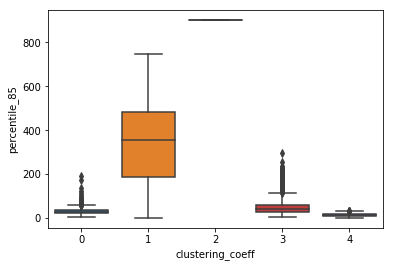

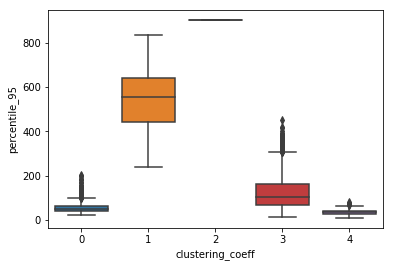

In [14]:
#plot the variables values per cluster for interpretation
for var in li_var_cont:
    ax = sns.boxplot(x="clustering_coeff", y=var, data=df_plt)
    plt.savefig(os.path.join(path_,'dailyTS_cluster_var_%s.png'%var),
            pi=300,format='png',bbox_inches='tight')
    plt.show()

# Clustering of outside variables at hen level - Wintergarten profiles

In [11]:
#how many types? the one that never goes, the one that always goes, the one that always goes 5 times, the one that only goes 
#once in the morning, the one that only goes when its sunny etc

In [ ]:
#when, how many times, how long, weather of the day, ...